## Setup Envionment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import yfinance as yf
%matplotlib inline
import pandas_datareader.data as web

## Collection of Data

In [2]:
data=yf.Ticker("GOOG")

In [3]:
df=data.history(period="max")

## Stock Price Visualization

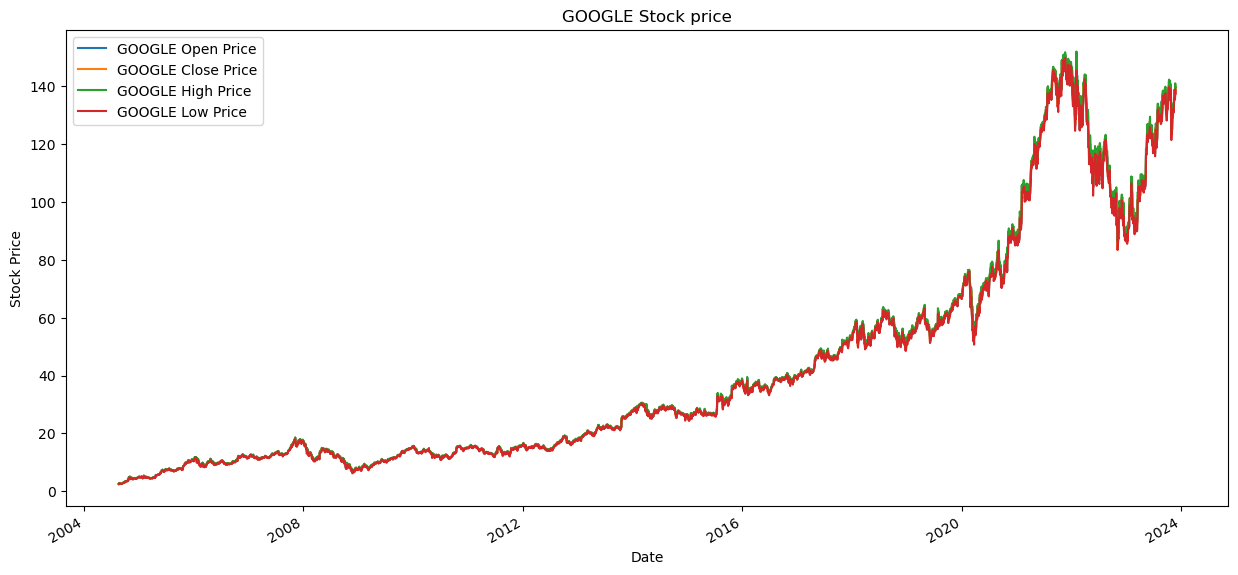

In [4]:
df["Open"].plot(label="GOOGLE Open Price" , figsize=(15,7))
df["Close"].plot(label="GOOGLE Close Price")
df["High"].plot(label="GOOGLE High Price")
df["Low"].plot(label="GOOGLE Low Price")
plt.legend()
plt.title("GOOGLE Stock price")
plt.ylabel("Stock Price")
plt.show()

## Volume Traded Visualization

Text(0.5, 1.0, 'Volume Traded By Google')

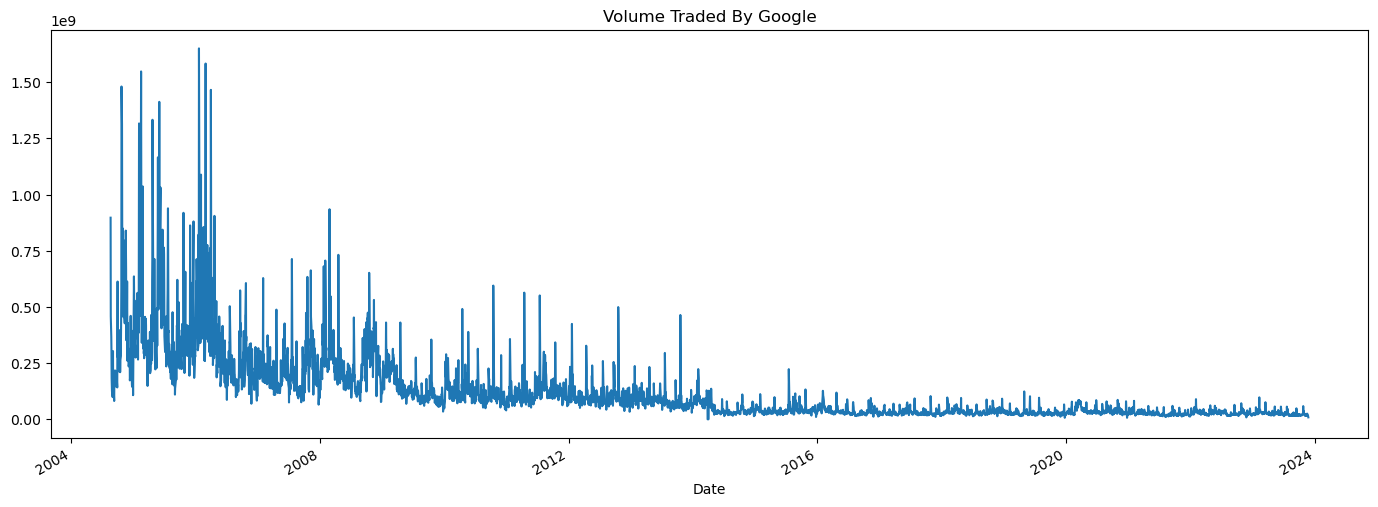

In [5]:
df['Volume'].plot(figsize=(17,6))
plt.title("Volume Traded By Google")

In [6]:
tesle=yf.Ticker("TSLA")
ford=yf.Ticker("F")
gm=yf.Ticker("GM")

In [7]:
df=tesle.history()

In [8]:
df1=ford.history()

In [9]:
df2=gm.history()

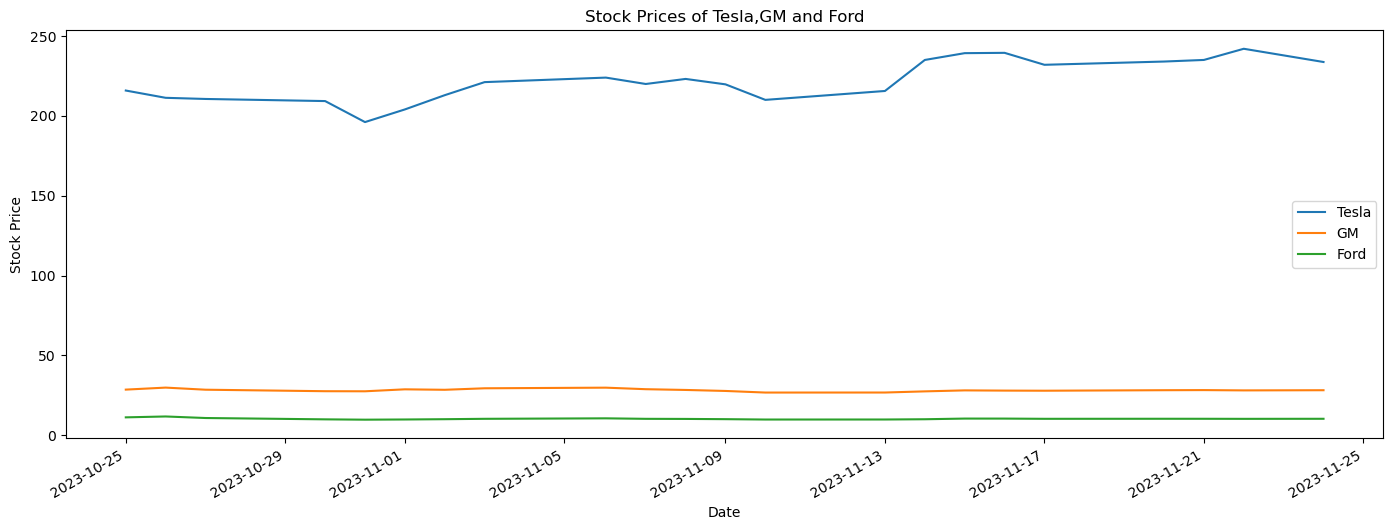

In [10]:
df["Open"].plot(label="Tesla",figsize=(17,6))
df2["Open"].plot(label="GM")
df1["Open"].plot(label="Ford")
plt.ylabel("Stock Price")
plt.title("Stock Prices of Tesla,GM and Ford")
plt.legend()


## Volumne Traded & Interpretations

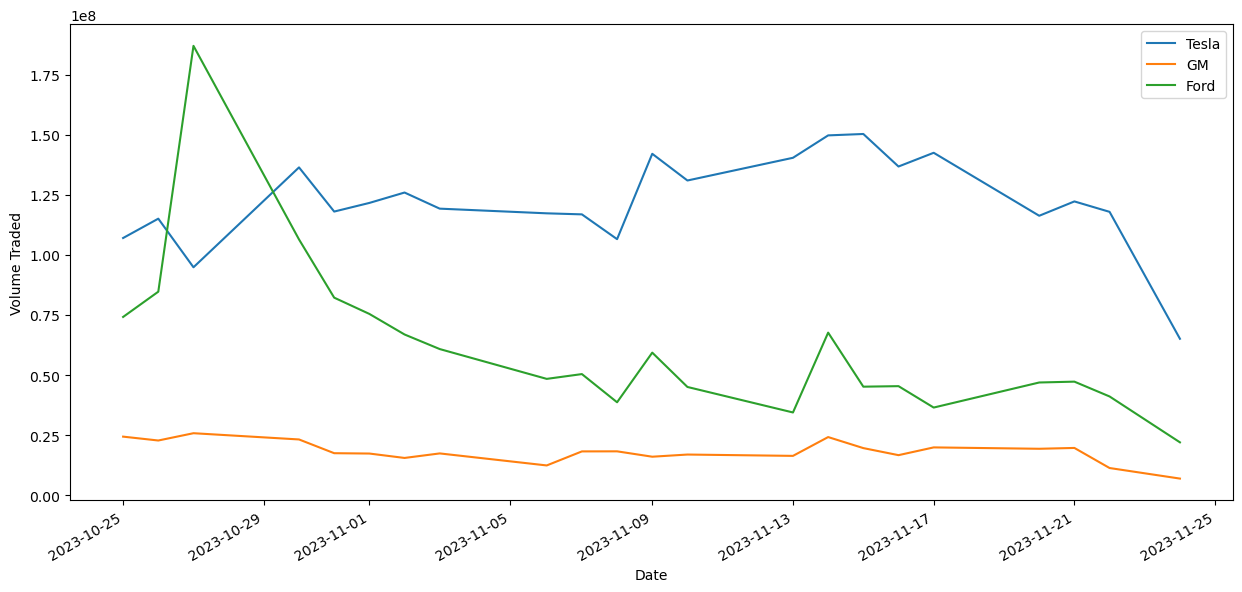

In [11]:
df['Volume'].plot(label="Tesla" ,figsize=(15,7))
df2['Volume'].plot(label="GM")
df1['Volume'].plot(label="Ford")
plt.ylabel("Volume Traded")
plt.legend()

In [ ]:
df1.iloc[[ford['Volume'].argmax()]]

In [ ]:
ford.iloc[493:550]['Open'].plot()

## MARKET CAP

In [14]:
df['Total Traded'] = df['Open'] * df['Volume']

In [ ]:
df.history()

In [16]:
df2['Total Traded'] = df2['Open'] * df2['Volume']

In [ ]:
df2.history()

In [18]:
df1['Total Traded'] = df1['Open'] * df1['Volume']

In [ ]:
ford.history()

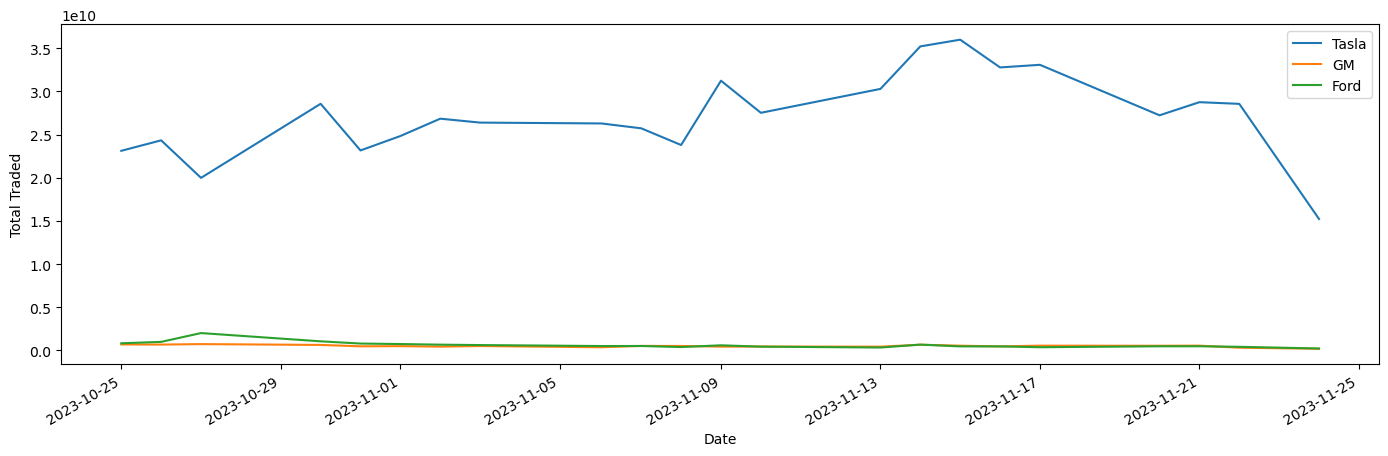

In [19]:
df['Total Traded'].plot(label="Tasla" , figsize=(17,5))
df2['Total Traded'].plot(label="GM")
df1['Total Traded'].plot(label="Ford")
plt.ylabel("Total Traded")
plt.legend()

In [ ]:
df['Total traded'].argmax()

In [ ]:
tesle.iloc[[tesle['Total Traded'].argmax()]]

In [ ]:
def MA(df2,period):
    return df2["Open"].rolling(period).mean()

<Axes: xlabel='Date'>

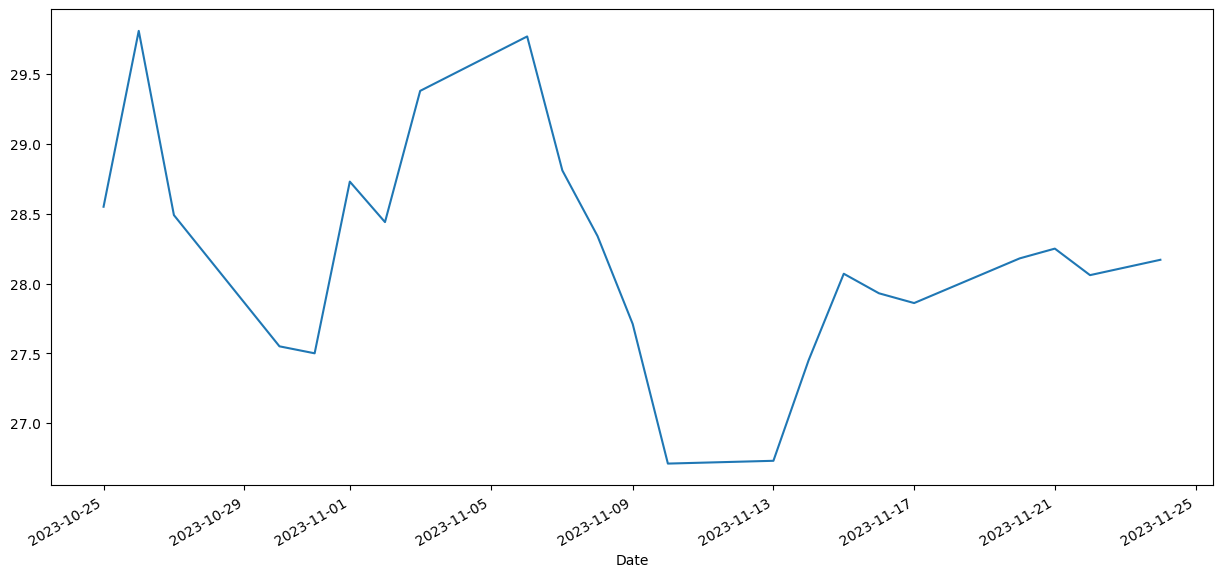

In [22]:
df2["Open"].plot(label="No Moving Average",figsize=(15,7))


## CORRELATION & SCATTER MATRIX

In [23]:
from pandas.plotting import scatter_matrix
#import pandas as pd 

In [24]:
car_comp=pd.concat([df['Open'],df2['Open'],df1['Open']] , axis=1)
car_comp.columns=['Tesla Open','GM Open','Ford Open']

array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='GM Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='GM Open'>,
        <Axes: xlabel='GM Open', ylabel='GM Open'>,
        <Axes: xlabel='Ford Open', ylabel='GM Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Ford Open'>,
        <Axes: xlabel='GM Open', ylabel='Ford Open'>,
        <Axes: xlabel='Ford Open', ylabel='Ford Open'>]], dtype=object)

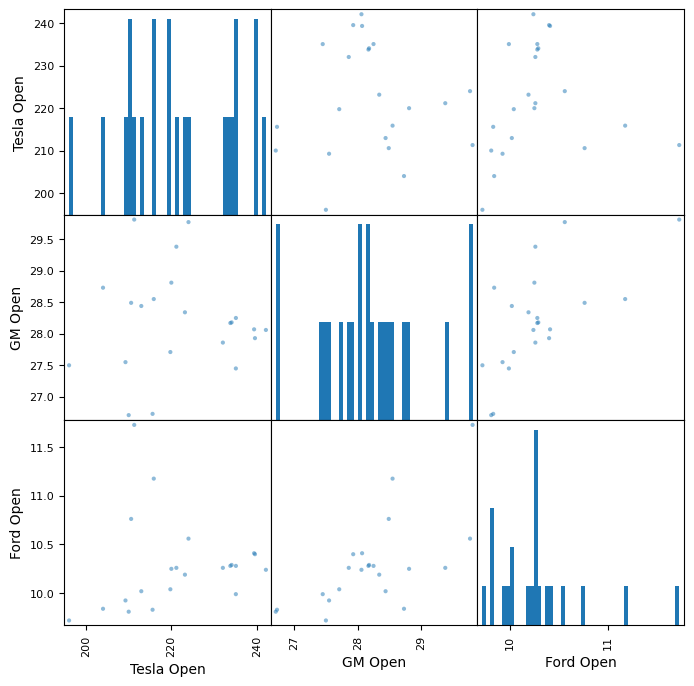

In [25]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50})

## CANDLESTICKS CHARTS

c:\Users\anjal\miniconda3\envs\myenv\Lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


([], [])

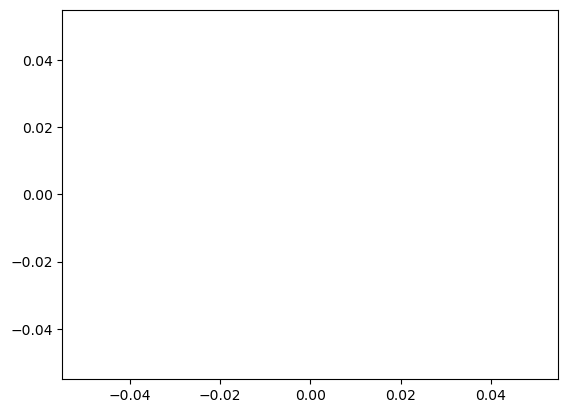

In [26]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator ,MONDAY
ford_reset=df1.loc['2012-01':'2012-01'].reset_index()
ford_reset['date_ax']=ford_reset['Date'].apply(lambda date:date2num(date))
ford_values=[tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']].values]
mondays=WeekdayLocator(MONDAY)
alldays=DayLocator()
WeekdayLocator=DateFormatter('%b %d')
dayFormatter=DateFormatter('%d')
fig,ax=plt.subplots()
candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r')

## DAILY PERCENTAGE CHANGE

r1=(pt/pt-1)-1

In [27]:
df['returns']=(df['Close']/df['Close'].shift(1))-1

In [29]:
df['returns'].history()

AttributeError: 'Series' object has no attribute 'history'

In [30]:
df2['returns']=(df2['Close']/df2['Close'].shift(1))-1

In [ ]:
df2.history()

In [31]:
df1['returns']=(df1['Close']/df1['Close'].shift(1))-1

In [ ]:
df1.history()

<Axes: >

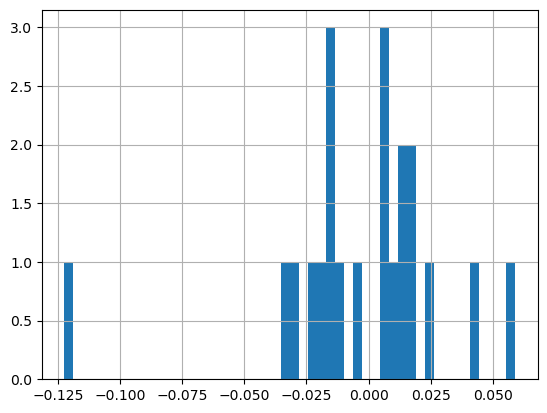

In [32]:
df1['returns'].hist(bins=50)

<Axes: >

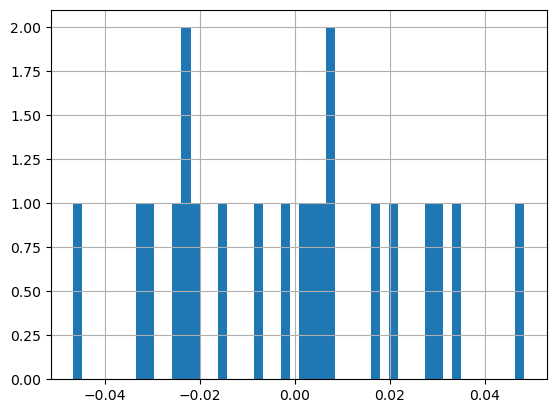

In [33]:
df2['returns'].hist(bins=50)

<Axes: >

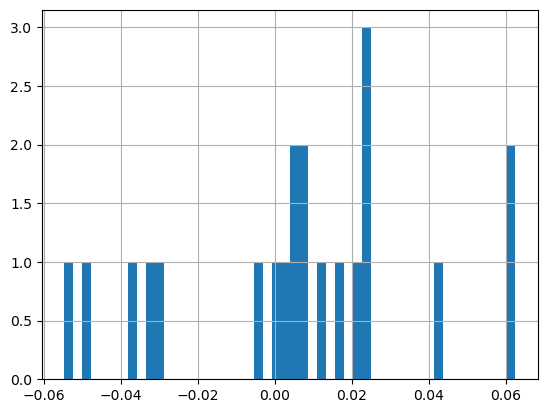

In [34]:
df['returns'].hist(bins=50)

<Axes: >

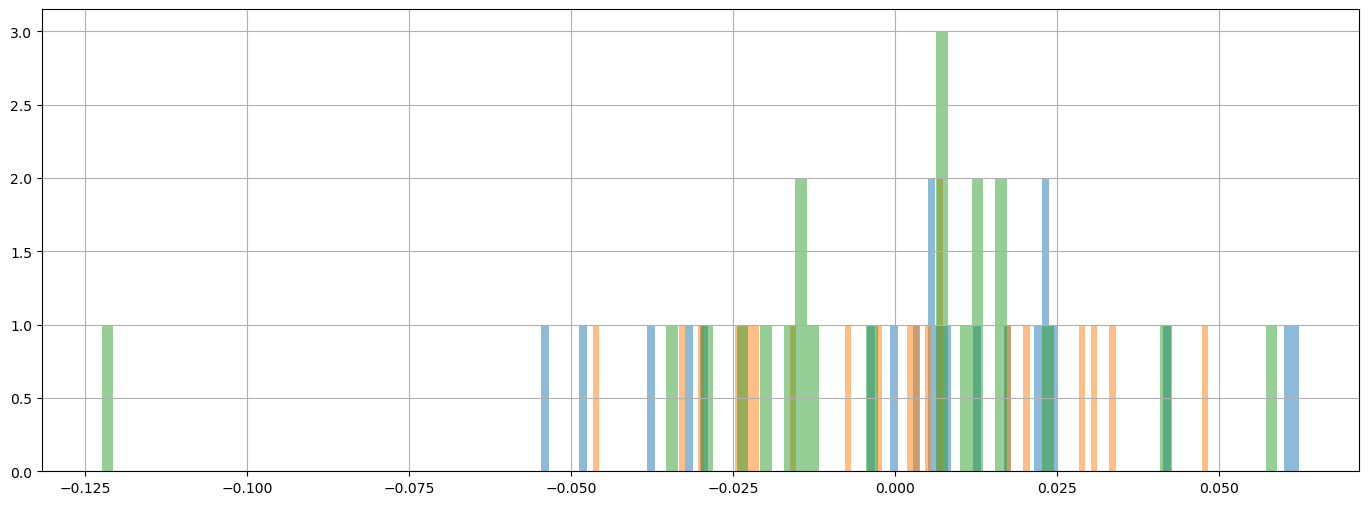

In [35]:
df['returns'].hist(bins=100 , label="Tesla",alpha=0.5,figsize=(17,6))
df2['returns'].hist(bins=100 , label="GM",alpha=0.5)
df1['returns'].hist(bins=100 , label="Ford",alpha=0.5)

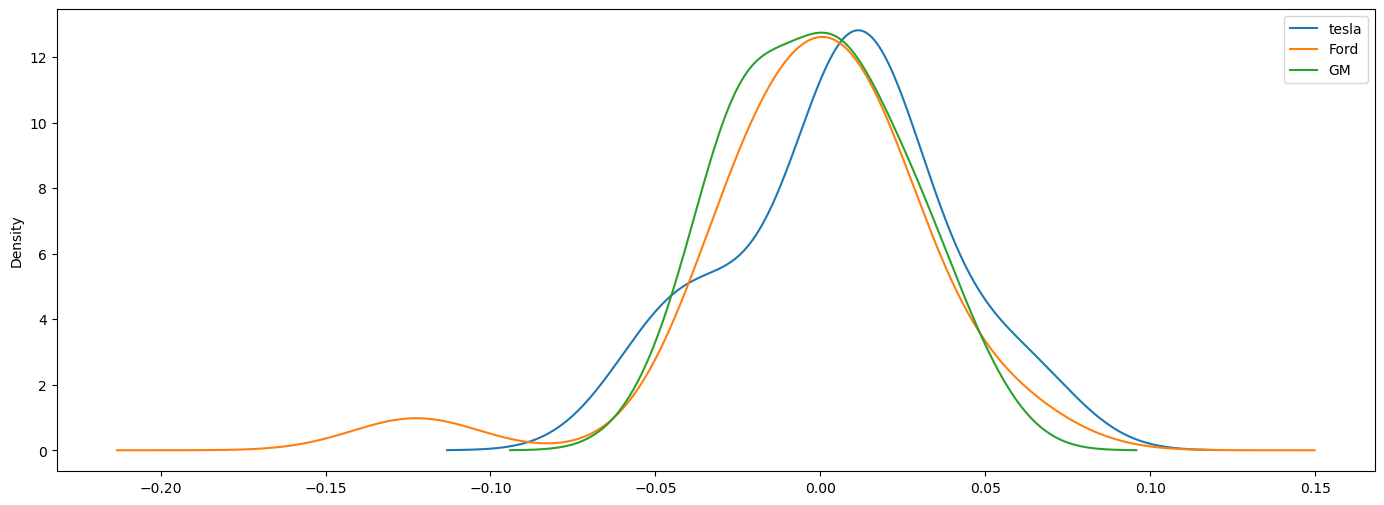

In [36]:
df['returns'].plot(kind='kde',label="tesla",figsize=(17,6))
df1['returns'].plot(kind='kde',label="Ford")
df2['returns'].plot(kind='kde',label="GM")
plt.legend()

## COMULATIVE RETURN

                        It=(1+rt)It-1=(1+pt/pt-1)it-1=(pt/pt-1)it-1

In [37]:
df['Cumulative_returns']=(1+df['returns']).cumprod()

In [ ]:
tesle.history()

In [38]:
df2['Cumulative_returns']=(1+df2['returns']).cumprod()

In [ ]:
gm.history()

In [39]:
df1['Cumulative_returns']=(1+df1['returns']).cumprod()

In [ ]:
ford.history()

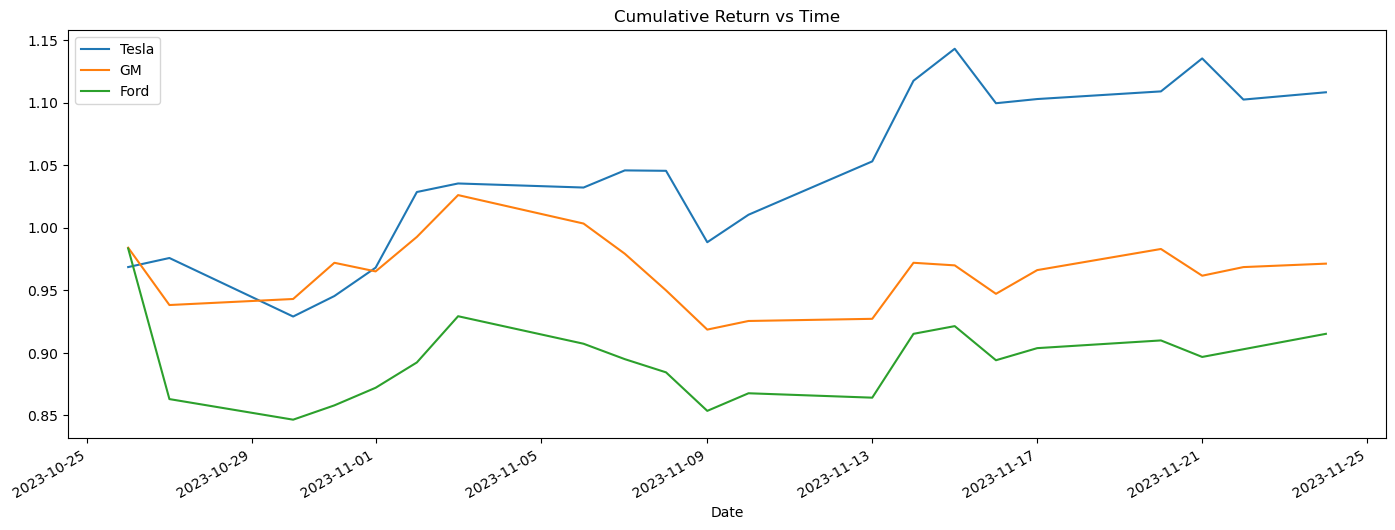

In [40]:
df['Cumulative_returns'].plot(label="Tesla",figsize=(17,6))
df2['Cumulative_returns'].plot(label="GM")
df1['Cumulative_returns'].plot(label="Ford")
plt.title("Cumulative Return vs Time")
plt.legend()